In [3]:
from sklearn import datasets

In [4]:
name = "Aakash"
role = "Data Scientist"
year = 2021

In [5]:
print("{} will become a {} in the upcoming year of {}".format(name, role, year)

SyntaxError: unexpected EOF while parsing (<ipython-input-5-853e806e1df7>, line 1)

In [6]:
print("{} will become a {} in the upcoming year of {}".format(name, role, year))

Aakash will become a Data Scientist in the upcoming year of 2021


In [9]:
iris_dataset = datasets.load_iris()

In [10]:
x = iris_dataset.data[:,:2]
print(x.shape)

(150, 2)


In [7]:
x_count = len(x.flat)
x_min = x[:,0].min

In [8]:
x_max = x[:,0].max
x_mean = x[:,0].mean()

In [9]:
x_count, x_min, x_max, x_mean

(300, <function ndarray.min>, <function ndarray.max>, 5.843333333333334)

In [10]:
import sys
print("Sys Version is: {}".format(sys.version))
import sklearn
print("Sklearn Version is: {}".format(sklearn.__version__))
import matplotlib
print("Matplotlib Version is: {}".format(matplotlib.__version__))
import pandas
print("Pandas Version is: {}".format(pandas.__version__))
import scipy
print("Scipy Version is: {}".format(scipy.__version__))
import numpy
print("Numpy Version is: {}".format(numpy.__version__))

Sys Version is: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
Sklearn Version is: 0.24.1
Matplotlib Version is: 3.3.4
Pandas Version is: 1.2.4
Scipy Version is: 1.6.2
Numpy Version is: 1.20.1


In [13]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Matplotlib is building the font cache; this may take a moment.


In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width','petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names = names)

In [17]:
print(dataset.shape)

(150, 5)


In [18]:
print(dataset.head(30))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [19]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [22]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

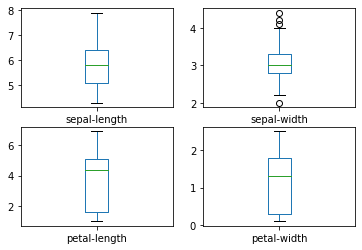

In [23]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex = False, sharey = False)

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

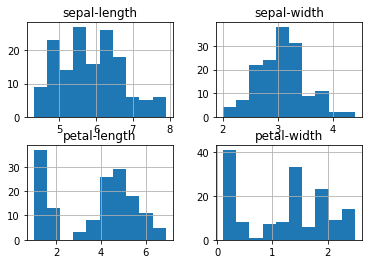

In [25]:
dataset.hist()

array([[<AxesSubplot:xlabel='sepal-length', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='petal-length', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='petal-width', ylabel='sepal-length'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='petal-length', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='petal-width', ylabel='sepal-width'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='petal-length'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='petal-length'>,
        <AxesSubplot:xlabel='petal-length', ylabel='petal-length'>,
        <AxesSubplot:xlabel='petal-width', ylabel='petal-length'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='petal-width'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='petal-width'>,
        <AxesSubplot:xlabel='petal-length', ylabel='petal-

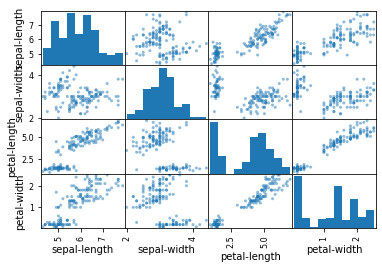

In [26]:
scatter_matrix(dataset)

In [28]:
array = dataset.values
X = array[:,0:4]
Y = array[:, 4]
validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state=seed)

In [29]:
seed = 6
scoring = 'accuracy'

In [38]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNC", KNeighborsClassifier()))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVC", SVC()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    msg = "%s: %f (%f)"%(name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Aakash Garg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aakash Garg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNC: 0.958333 (0.041667)
DTC: 0.958333 (0.041667)
GNB: 0.966667 (0.040825)
SVC: 0.941667 (0.053359)


In [1]:
from scipy import cluster

In [2]:
help(cluster)

Help on package scipy.cluster in scipy:

NAME
    scipy.cluster

DESCRIPTION
    Clustering package (:mod:`scipy.cluster`)
    
    .. currentmodule:: scipy.cluster
    
    :mod:`scipy.cluster.vq`
    
    Clustering algorithms are useful in information theory, target detection,
    communications, compression, and other areas. The `vq` module only
    supports vector quantization and the k-means algorithms.
    
    :mod:`scipy.cluster.hierarchy`
    
    The `hierarchy` module provides functions for hierarchical and
    agglomerative clustering.  Its features include generating hierarchical
    clusters from distance matrices,
    calculating statistics on clusters, cutting linkages
    to generate flat clusters, and visualizing clusters with dendrograms.

PACKAGE CONTENTS
    _hierarchy
    _optimal_leaf_ordering
    _vq
    hierarchy
    setup
    tests (package)
    vq

DATA
    __all__ = ['vq', 'hierarchy']

FILE
    c:\users\aakash garg\anaconda3\lib\site-packages\scipy\cluster

In [3]:
from scipy import special

In [4]:
a = special.exp10(2)

In [5]:
print(a)

100.0


In [6]:
b = special.exp2(3)
print(b)

8.0


In [7]:
c = special.sindg(90)
print(c)

1.0


In [9]:
from scipy import integrate

In [11]:
i = integrate.quad(lambda x:special.exp10(x), 0, 1)
print(i)

(3.9086503371292665, 4.3394735994897923e-14)


In [12]:
e = lambda x, y: x*y**2
f = lambda x : 1
g = lambda x: -1
integrate.dblquad(e, 0, 2, f, g)

(-0.0, 4.405142707569776e-14)

In [13]:
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       quad_vec      -- General purpose integration of vector-valued functions
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose N-D integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Warning on i

In [14]:
from scipy import integrate

In [15]:
x = lambda x:special.exp2(x)
a = integrate.quad(x, 0, 1)
print(a)

(1.4426950408889634, 1.6017132519074587e-14)


In [16]:
e = lambda x, y: x*y**2
f = lambda x : 1
g = lambda x: -1
integrate.dblquad(e, 0, 2, f, g)

(-0.0, 4.405142707569776e-14)

In [24]:
from scipy.fftpack import fft, ifft

In [25]:
import numpy as np

In [26]:
x = np.array([1,2,3,4])
y = fft(x)
print(y)

[10.-0.j -2.+2.j -2.-0.j -2.-2.j]


In [31]:
from scipy import linalg
a = np.array([[1,2],[5,6]])
b = linalg.inv(a)
print(b)

[[-1.5   0.5 ]
 [ 1.25 -0.25]]


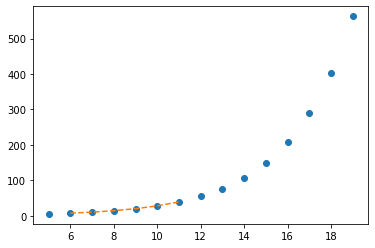

In [33]:
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(5, 20)
y = np.exp(x/3.0)
f = interpolate.interp1d(x, y)
x1 = np.arange(6, 12)
y1 = f(x1)
plt.plot(x, y, 'o', x1, y1, '--')
plt.show()